In [13]:
from bertopic import BERTopic
import os
import os.path
# https://github.com/MaartenGr/BERTopic/issues/517#issuecomment-1140725239
import pyspark
import pynndescent
pynndescent.rp_trees.FlatTree.__module__  = "pynndescent.rp_trees"

In [8]:
authors = [
    "Topsoee", "JacobsenJP", "SkramE", "SkramA", "AndersenHC",
    "Bauditz", "Bang", "Kielland", "Schandorph", "Drachman",
    "Hamsun", "HansenJH", "Pontoppidan", "GB",
    "Levison", "Fibiger"
    ]
paths = [os.path.join("korpus", filename) for filename in os.listdir("korpus")
         if filename.endswith(".txt") and
         any((("_" + author + "_") in filename) for author in authors)]
len(paths)

67

In [9]:
def split(list_a, chunk_size):
    for i in range(0, len(list_a), chunk_size):
        yield list_a[i:i + chunk_size]

In [10]:
docs = []
for path in paths:
    with open(path, encoding="utf-8") as f:  # 75 token chunks
        docs += [" ".join(chunk) for chunk in split(f.read().split(), 75)]
docs[:3]
len(docs)

60373

In [14]:
topic_model = BERTopic(language="multilingual")
topics, probs = topic_model.fit_transform(docs)

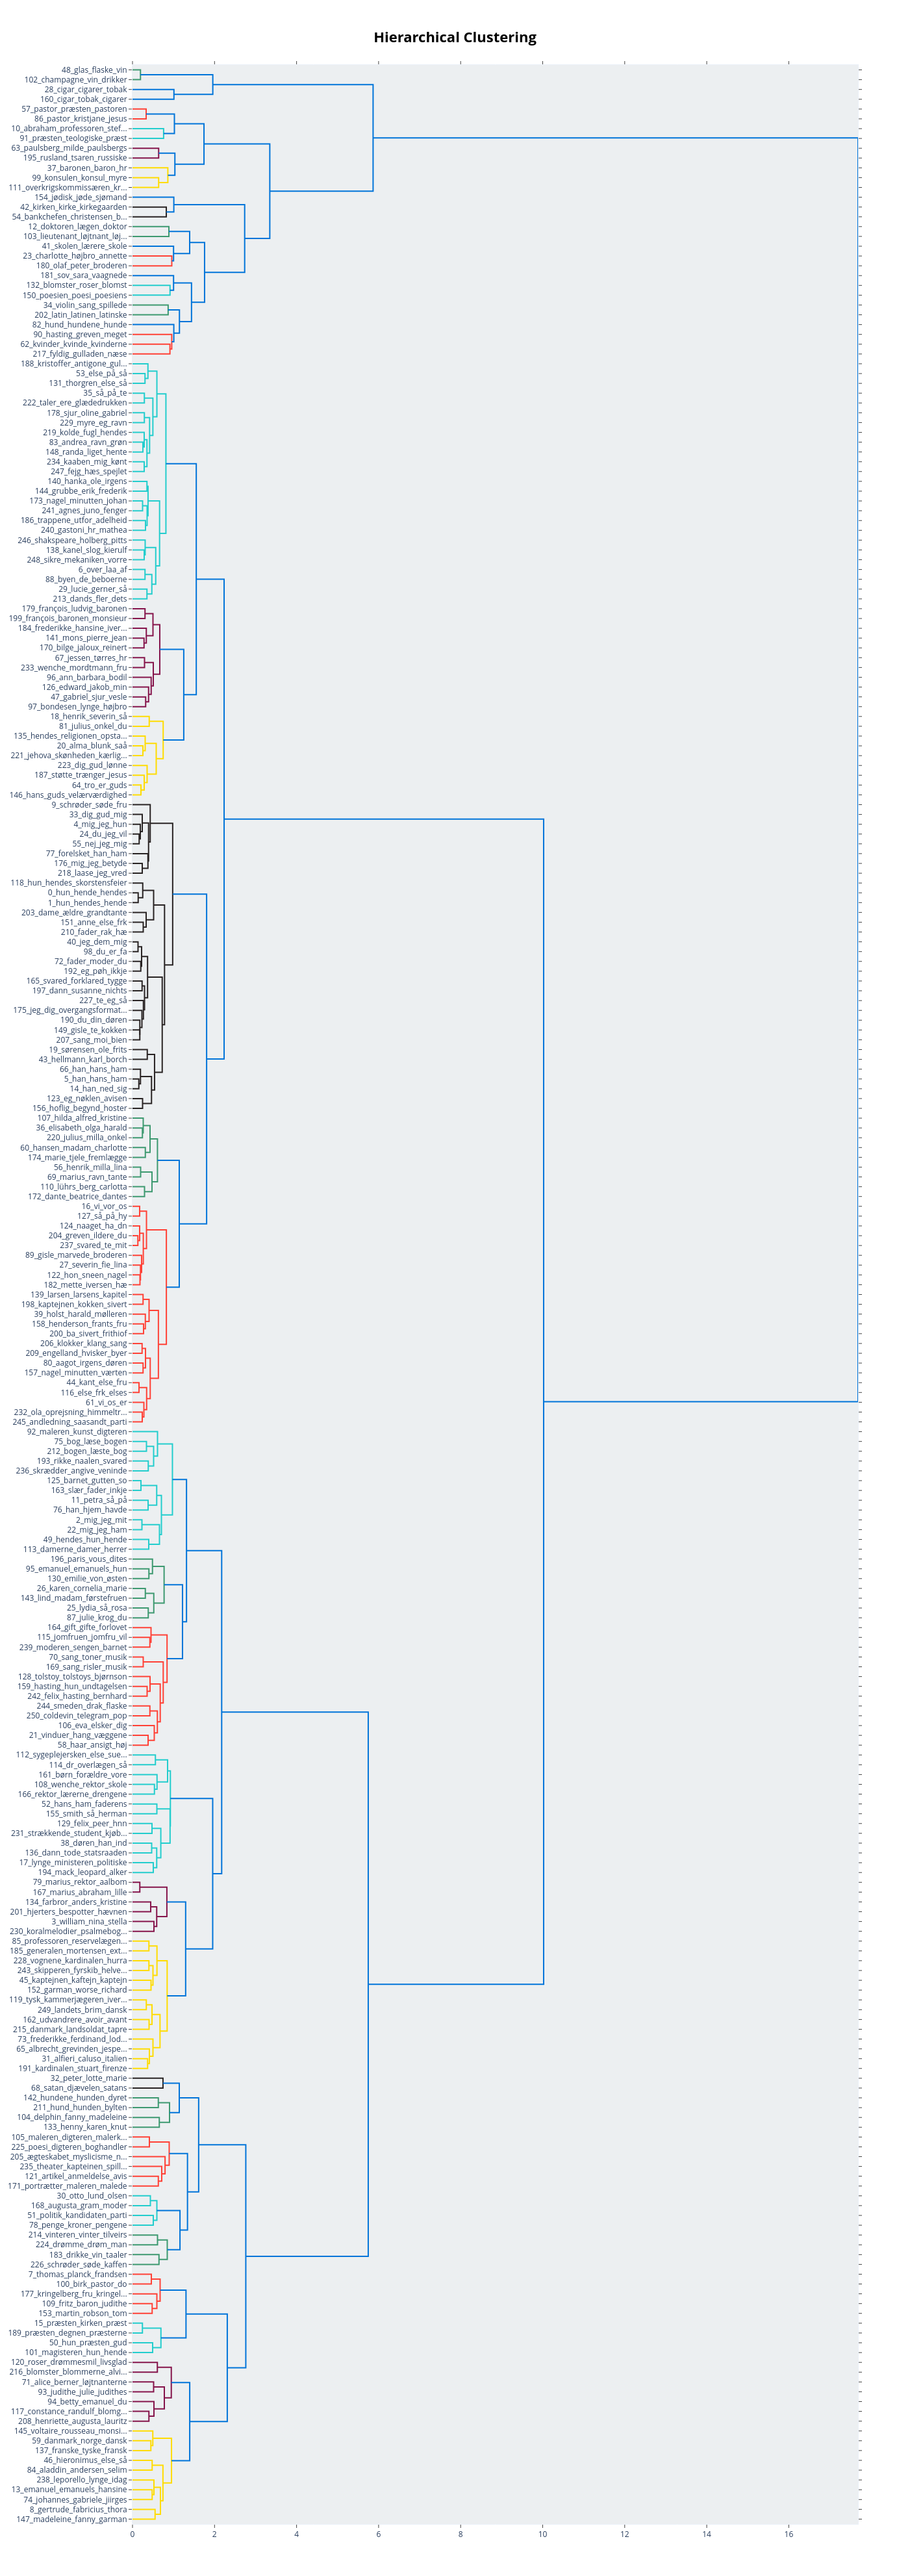

In [15]:
topic_model.visualize_hierarchy()

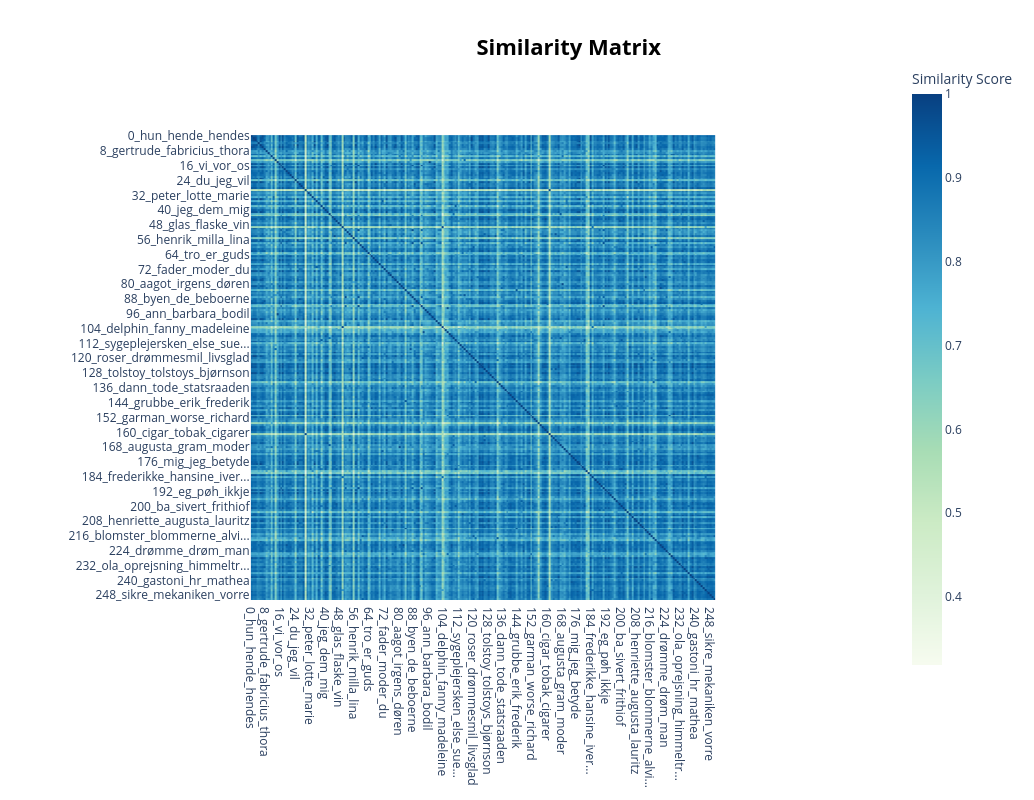

In [16]:
topic_model.visualize_heatmap()